# Import Package

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import pickle
pd.options.display.max_columns=999

%matplotlib inline
warnings.filterwarnings("ignore")

# Problem

Bagaimana cara menetukkan manakah nasabah yang akan keluar atau bertahan agar dapat memepertahankan nasabah atau meminimalisir nasabah yang akan keluar, terutama nasabah yang potensial yang diperkirakan akan keluar?

# Goals

Dapat menentukkan manakah nasabah yang akan keluar agar pihak bank dapat melakukan treatment pada nasabah tersebut agar tetap bertahan di bank tersebut, agar nasabah yang potensial tidak berhenti untuk menjadi nasabahnya.

# Import Data and Data Cleaning

In [14]:
df = pd.read_csv('bank.csv', index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0], dtype=int64)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [17]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Data sudah bersih dan tidak ada data yang Null.

In [18]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [19]:
df.describe(include='O')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# Exploratory Data Analysis

In [21]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
pd.crosstab(index=df['Exited'], columns=df['Gender'])

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


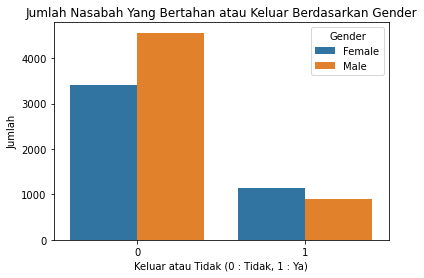

In [24]:
sns.countplot(df['Exited'], hue=df['Gender'])
plt.xlabel('Keluar atau Tidak (0 : Tidak, 1 : Ya)')
plt.ylabel('Jumlah')
plt.title('Jumlah Nasabah Yang Bertahan atau Keluar Berdasarkan Gender')
plt.show()

Jika dilihat dari plot di atas nasabah yang paling banyak bertahan adalah pria dibandingkan dengan wanita, sedangkan untuk nasabah yang keluar paling banyak adalah wanita dibandingkan dengan pria, mungkin karena bagi yang sudah berkeluarga lebih baik memiliki tabungan yang sama dan tabungan yang digunakan adalah milik suaminya, atau mungkin karena tidak semua wanita bekerja sehingga tabungannya tidak terpakai sehingga memutuskan untuk keluar.

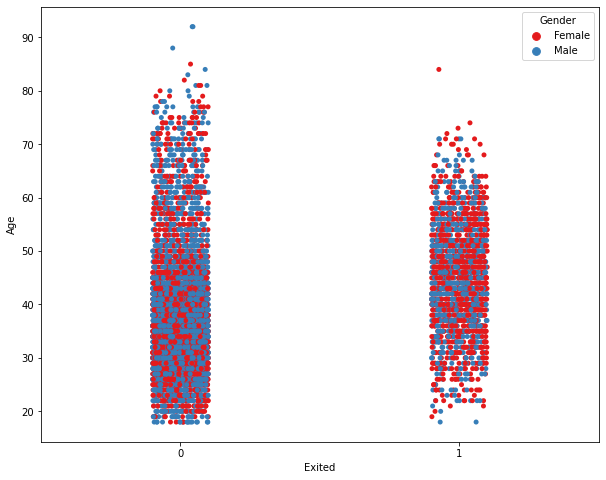

In [27]:
plt.figure(figsize=(10,8))
sns.stripplot(df['Exited'],df['Age'],hue=df['Gender'],palette='Set1')

Dilihat dari gambar di atas baik wanita ataupun pria banyak yang keluar dari bank antara usia 35 sampai 55, sedangkan umur 60 tahun ke atas banyak yang lebih memilih untuk bertahan, mungkin karena biasanya umur 60 tahun ke atas sudah masuk masa pensiun dan mereka memiliki tabungan khusus untuk menerima dana pensiun memuat mereka lebih cenderung bertahan pada satu bank karena biasanya dana pensiun hanya ditransfer dari den ke bank yang sudah ditentukan.

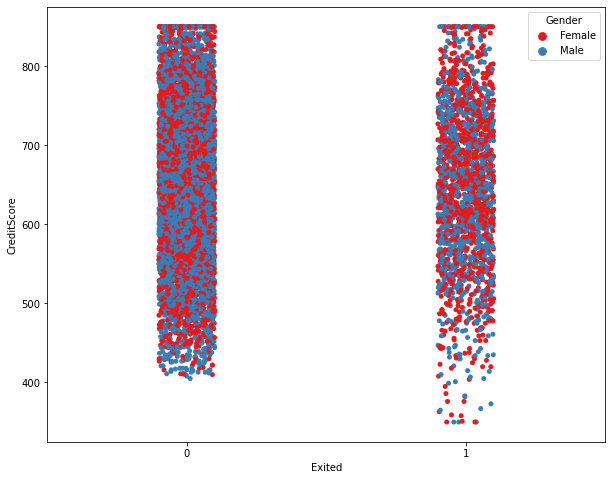

In [28]:
plt.figure(figsize=(10,8))
sns.stripplot(df['Exited'],df['CreditScore'],hue=df['Gender'],palette='Set1')

Jika dilihat berdasarkan credit score orang yang memilih keluar ataupun bertahan tidak terlalu terlihat, hanya saja seseorang yang memiliki credit score dibawah 400 lebih memilih keluar dari bank tersebut.

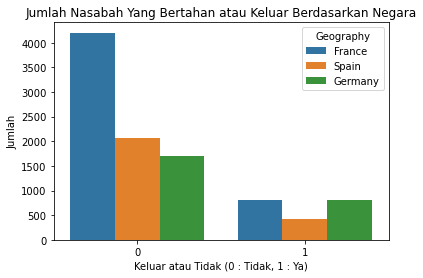

In [33]:
sns.countplot(df['Exited'], hue=df['Geography'])
plt.xlabel('Keluar atau Tidak (0 : Tidak, 1 : Ya)')
plt.ylabel('Jumlah')
plt.title('Jumlah Nasabah Yang Bertahan atau Keluar Berdasarkan Negara')
plt.show()

Dilihat berdasarkan negara paling banyak bertahan pada suatu bank adalah Perancis jika dibandingkan dengan Jerman ataupun Spanyol, untuk yang keluar perbedaan antara Perancis dan Jerman tidak tidak berbeda jauh.

In [35]:
df.groupby(['Gender','Geography'])['Exited'].sum()

Gender  Geography
Female  France       460
        Germany      448
        Spain        231
Male    France       350
        Germany      366
        Spain        182
Name: Exited, dtype: int64

Jika dilihat berdasarkan jenis kelamin dan negara paling tinggi seseorang keluar dari bank adalah wanita dari Perancis, sedangkan untuk jenis kelamin pria paling tinggi di negara Jerman.

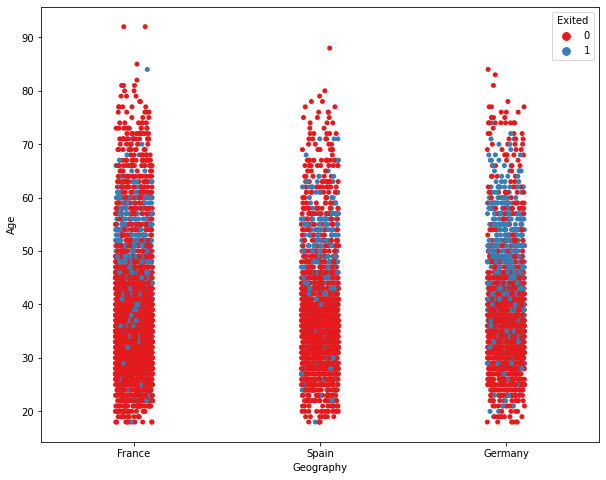

In [39]:
plt.figure(figsize=(10,8))
sns.stripplot(df['Geography'],df['Age'],hue=df['Exited'],palette='Set1')

Jika dilihat dari gambar di atas di Perancis setelah berumur 60 tahun lebih banyak yang bertahan dibandingkan yang keluar, karena para pekerja di Perancis pensiun pada umur 62 tahun sehingga mereka akan bertahan pada satu bank untuk mendapatkan biaya pensiun dari perushaan menggunakan bank yang telah ditentukkan sehingga angka bertahannya pun cukup tinggi.

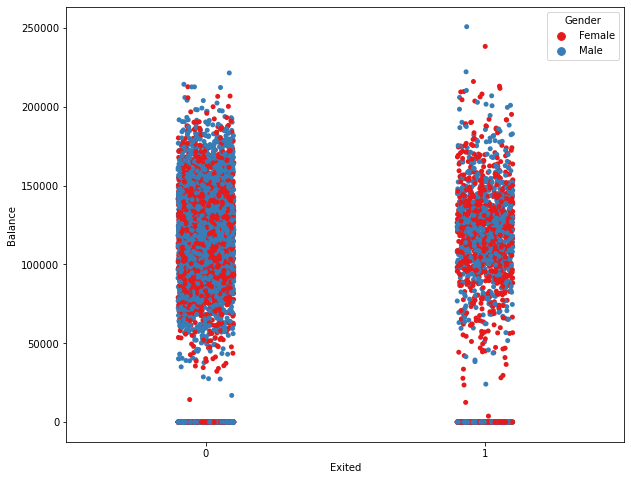

In [40]:
plt.figure(figsize=(10,8))
sns.stripplot(df['Exited'],df['Balance'],hue=df['Gender'],palette='Set1')

Jika dilihat berdasarkan Balance atau uang yang tersis di rekening orang yang memilih keluar paling banyak memiliki sisa tabungan antara 800000 sampai dengan 150000.

In [51]:
df.groupby(['Exited'])['Balance'].mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

Berdasarkan rata-rata sisa saldo ternyata orang yang keluar memiliki rata-rata sisa saldo yang lebih tinggi dibandingkan bertahan.

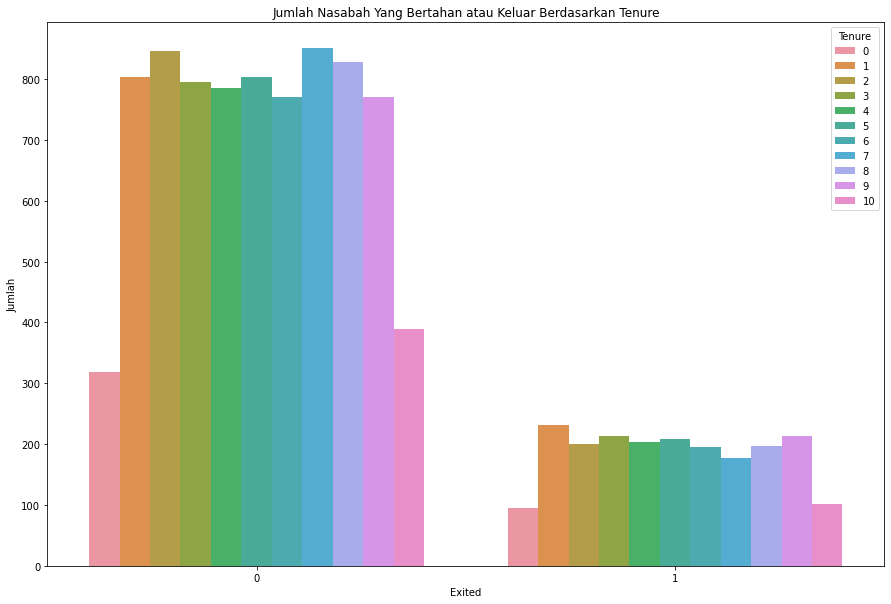

In [164]:
plt.figure(figsize=(15,10))
sns.countplot(df['Exited'], hue=df['Tenure'])
plt.ylabel('Jumlah')
plt.title('Jumlah Nasabah Yang Bertahan atau Keluar Berdasarkan Tenure')
plt.show()

Dilihat berdasarkan Tenure orang yang memiliki Tenure 0 dan 10 jumlah yang keluar lebih kecil dibandingkan dengan orang yang memiliki tenure dari 1 sampai 9, sama halnya dengan yang bertahan. Bisa dilihat dari plot di atas orang yang bertahan dan keluar memiliki pola yang sama jika berdasarkan tenure.

In [42]:
pd.crosstab(index=df['NumOfProducts'], columns=df['Exited'], values=df['Exited'], aggfunc='count')

Exited,0,1
NumOfProducts,,
1,3675.0,1409.0
2,4242.0,348.0
3,46.0,220.0
4,NaN,60.0


Berdasarkan pada produk bank yang dimiliki, customer yang memiliki produk hanya 1 pada bank tersebut lebih cenderung keluar jika dibandingkan dengan yang memiliki produk lebih dari 1, mungkin mereka hanya sementara atau coba-coba pada bank tersebut atau tidak puas dengan produk tersebut sehingga hanya memiliki 1 produk dan memilih untuk keluar dari bank tersebut.

In [43]:
pd.crosstab(index=df['HasCrCard'], columns=df['Exited'], values=df['Exited'], aggfunc='count')

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


Jika dilihat berdasarkan memiliki credit card atau tidak orang yang memilih keluar kebanyakan tidak memiliki credit card dibandingkan dengan yang memiliki credit card, karena mungkin mereka menggunakan jasa bank tersebut hanya untuk tabungan saja sehingga kemungkinan untuk keluar cukup besar.

In [44]:
pd.crosstab(index=df['IsActiveMember'], columns=df['Exited'], values=df['Exited'], aggfunc='count')

Exited,0,1
IsActiveMember,,
0,3547,1302
1,4416,735


Dilihat dari aktif atau tidaknya customer tersebut ternyata customer yang keluar paling banyak merupakan member yang aktif jika dibandingkan dengan yang tidak aktif pada bank tersebut.

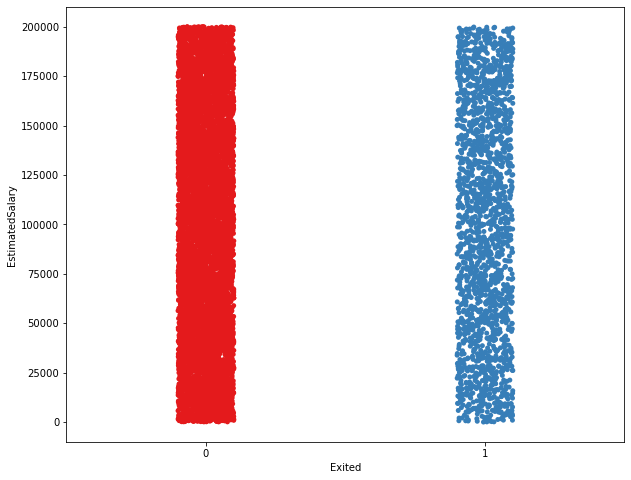

In [46]:
plt.figure(figsize=(10,8))
sns.stripplot(df['Exited'],df['EstimatedSalary'],palette='Set1')

Jika dilihat berdasarkan pendapatan pada gambar di atas, tidak terlalu terlihat orang dengan salary berapa yang lebih cenderung keluar karena sebaran data salary baik itu untuk yang bertahan atau keluar memiliki sebaran yang sama.

In [52]:
df.groupby(['Exited'])['EstimatedSalary'].mean()

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

Dilihat dari rata-rata salary ternyata rata-rata salary yang keluar lebih tinggi dibandingkan dengan yang bertahan.

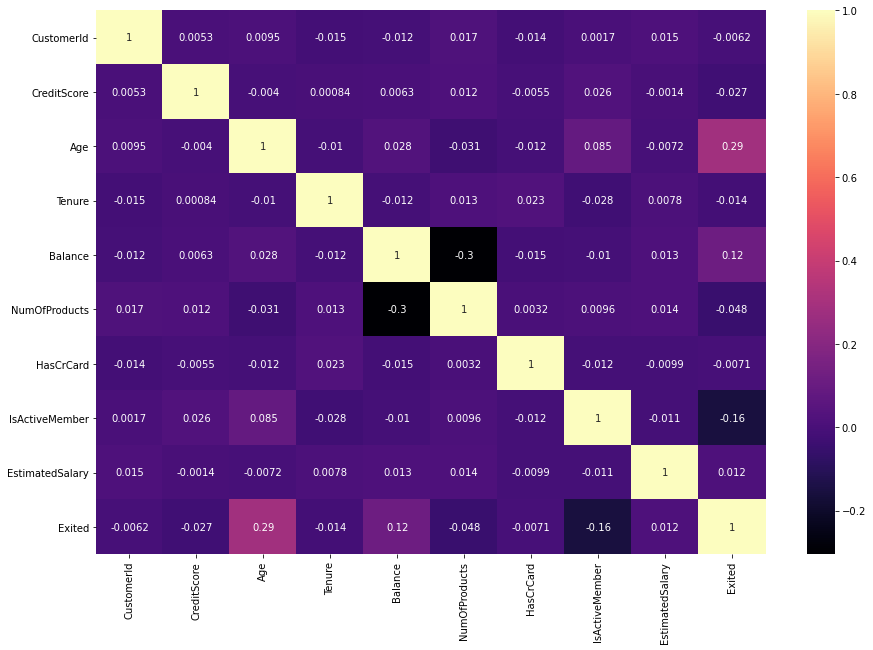

In [55]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='magma',annot=True)

# Data Preprocessing

In [53]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


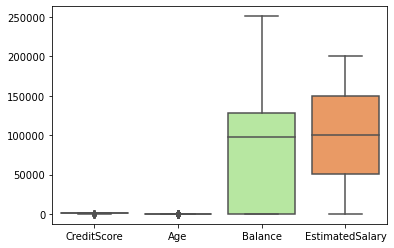

In [61]:
sns.boxplot(data=df[['CreditScore','Age','Balance','EstimatedSalary']],palette='rainbow')

Terdapat beberapa outlier pada CreditScore dan Usia, tetapi kita akan tetap menggunakan data terebut untuk modeling agar tetap bisa menebak pada saat kondisi creditscore atau usia besarnya sama dengan outlier.

# Feature Engineering and Feature Selection

In [63]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Kita akan drop kolom customerid dan surename karena tidak akan kita gunakan dalam modeling.

In [65]:
df.drop(columns=['CustomerId','Surname'], inplace=True)

In [68]:
df['Geography'] = df['Geography'].map({'France' :0, 'Spain': 1, 'Germany': 2})
df['Gender'] = df['Gender'].map({'Female' :0, 'Male': 1})


In [69]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,1,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,1,0,43,2,125510.82,1,1,1,79084.10,0


# Splitting Data

In [75]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [71]:
X = df.drop(columns='Exited')
y = df['Exited']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y, test_size=0.2, random_state=1)

# Machine Learning Model

Untuk yang default tanpa tunning kita tidak handling imbalance data terlebih dahulu, karena kita akan menggunakan class_weigth untuk handling imbalance data.

### Logistic Regression

In [74]:
modelReg = LogisticRegression()

In [76]:
modelReg.fit(X_train,y_train)

LogisticRegression()

In [78]:
y_pred_reg = modelReg.predict(X_test)

### Decision Tree Classifier

In [83]:
modelDT = DecisionTreeClassifier()

In [84]:
modelDT.fit(X_train,y_train)

DecisionTreeClassifier()

In [85]:
y_pred_DT = modelDT.predict(X_test)

### Random Forest Classifier

In [86]:
modelRF = RandomForestClassifier()

In [87]:
modelRF.fit(X_train,y_train)

RandomForestClassifier()

In [88]:
y_pred_RF = modelRF.predict(X_test)

## Evaluation Metrics

### Logistic Regression

In [79]:
cm_reg = confusion_matrix(y_test, y_pred_reg, labels=[1, 0])
df_reg = pd.DataFrame(cm_reg,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
df_reg

,Pred 1,Pred 0
Act 1,22,385
Act 0,29,1564


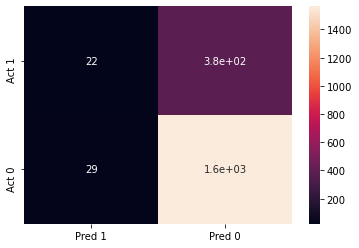

In [80]:
sns.heatmap(df_reg,annot=True)

In [81]:
print(classification_report(y_test,y_pred_reg))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1593
           1       0.43      0.05      0.10       407

    accuracy                           0.79      2000
   macro avg       0.62      0.52      0.49      2000
weighted avg       0.73      0.79      0.72      2000



### Decision Tree

In [89]:
cm_DT = confusion_matrix(y_test, y_pred_DT, labels=[1, 0])
df_DT = pd.DataFrame(cm_DT,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
df_DT

,Pred 1,Pred 0
Act 1,189,218
Act 0,209,1384


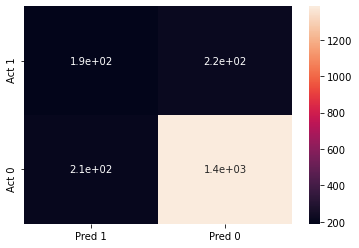

In [90]:
sns.heatmap(df_DT,annot=True)

In [91]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1593
           1       0.47      0.46      0.47       407

    accuracy                           0.79      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.78      0.79      0.79      2000



### Random Forest

In [92]:
cm_RF = confusion_matrix(y_test, y_pred_RF, labels=[1, 0])
df_RF = pd.DataFrame(cm_RF,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
df_RF

,Pred 1,Pred 0
Act 1,192,215
Act 0,57,1536


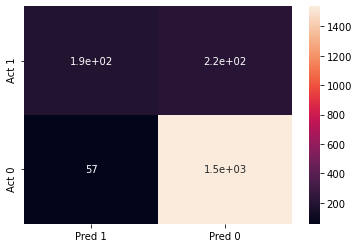

In [93]:
sns.heatmap(df_RF,annot=True)

In [94]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.47      0.59       407

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



Tujuan untuk modeling ini untuk meminimalisir orang yang keluar dianggap bertahan sehingga kita perlu mencari False Negative sekecil mungkin dan recall class 1 dan precision class 0 tinggi mungkin. Jika dilihat dari modeling di atas yang memiliki False Negative terkecil adalah algoritma Random Forest Classifier dengan FN sebesar 215, dan yang memiliki recall class 1 dan precision 0 tertinggi adalah algoritma Random Forest Classifier dengan score 0.47 dan 0.88. Jadi model terbaik adalah menggunakan Random Forest Classifier. Tetapi itu belum kita handling imbalance data dengan menggunakan class_weight, maka selanjutnya kita akan gunakan class_weight dan hyper parameter tunning untuk mencari model yang paling terbaik.

## Hyper Parameter Tunning and Cross Validation

### Logistic Regression

In [141]:
paramsReg = {
    "class_weight" : [None,{0 : 0.30, 1: 0.70},{0 : 0.20, 1: 0.80},{0 : 0.10, 1: 0.90}]
}

In [142]:
modelReg_CV = GridSearchCV(LogisticRegression(), paramsReg, cv=5, n_jobs=-1, verbose=1, scoring='recall')

In [143]:
modelReg_CV.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'class_weight': [None, {0: 0.3, 1: 0.7},
                                          {0: 0.2, 1: 0.8}, {0: 0.1, 1: 0.9}]},
             scoring='recall', verbose=1)

In [144]:
modelReg_CV.best_params_

{'class_weight': {0: 0.1, 1: 0.9}}

In [145]:
y_pred_reg_CV = modelReg_CV.predict(X_test)

### Decision Tree

In [150]:
paramsDT = {
    "class_weight" : [None,{0 : 0.30, 1: 0.70},{0 : 0.20, 1: 0.80},{0 : 0.10, 1: 0.90}],
    "max_depth" : [None, 5, 10, 20],
    "min_samples_split" :[2,5,10,20],
    "max_features" : [None,.2,.5,.8]
}

In [151]:
modelDT_CV = GridSearchCV(DecisionTreeClassifier(), paramsDT, cv=5, n_jobs=-1, verbose=1, scoring='recall')

In [152]:
modelDT_CV.fit(X_train,y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    6.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, {0: 0.3, 1: 0.7},
                                          {0: 0.2, 1: 0.8}, {0: 0.1, 1: 0.9}],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 0.2, 0.5, 0.8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='recall', verbose=1)

In [153]:
modelDT_CV.best_params_

{'class_weight': {0: 0.1, 1: 0.9},
 'max_depth': 5,
 'max_features': 0.2,
 'min_samples_split': 20}

In [154]:
y_pred_DT_CV = modelDT_CV.predict(X_test)

### Random Forest

In [190]:
paramsRF = {
    "n_estimators" : [100,130],
    "class_weight" : [None,{0 : 0.30, 1: 0.70},{0 : 0.20, 1: 0.80},{0 : 0.10, 1: 0.90}],
    "max_depth" : [None, 5,10, 20],
    "min_samples_split" :[2,5,10,20],
    "max_features" : [None,.2,.5,.8]
}

In [191]:
modelRF_CV = GridSearchCV(RandomForestClassifier(), paramsRF, cv=5, n_jobs=-1, verbose=1, scoring='recall')

In [192]:
modelRF_CV.fit(X_train,y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 12.9min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed: 13.6min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, {0: 0.3, 1: 0.7},
                                          {0: 0.2, 1: 0.8}, {0: 0.1, 1: 0.9}],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': [None, 0.2, 0.5, 0.8],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 130]},
             scoring='recall', verbose=1)

In [193]:
modelRF_CV.best_params_

{'class_weight': {0: 0.1, 1: 0.9},
 'max_depth': 5,
 'max_features': 0.2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [194]:
y_pred_RF_CV = modelRF_CV.predict(X_test)

## Evaluation Metrics

### Logistic regression

In [195]:
cm_reg_CV = confusion_matrix(y_test, y_pred_reg_CV, labels=[1, 0])
df_reg_CV = pd.DataFrame(cm_reg_CV,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
df_reg_CV

,Pred 1,Pred 0
Act 1,386,21
Act 0,1216,377


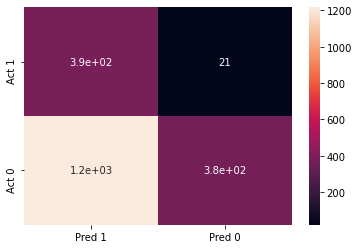

In [196]:
sns.heatmap(df_reg_CV,annot=True)

In [197]:
print(classification_report(y_test,y_pred_reg_CV))

              precision    recall  f1-score   support

           0       0.95      0.24      0.38      1593
           1       0.24      0.95      0.38       407

    accuracy                           0.38      2000
   macro avg       0.59      0.59      0.38      2000
weighted avg       0.80      0.38      0.38      2000



### Decision Tree

In [198]:
cm_DT_CV = confusion_matrix(y_test, y_pred_DT_CV, labels=[1, 0])
df_DT_CV = pd.DataFrame(cm_DT_CV,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
df_DT_CV

,Pred 1,Pred 0
Act 1,345,62
Act 0,737,856


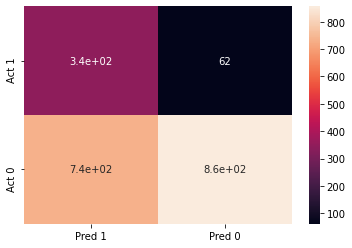

In [199]:
sns.heatmap(df_DT_CV,annot=True)

In [200]:
print(classification_report(y_test,y_pred_DT_CV))

              precision    recall  f1-score   support

           0       0.93      0.54      0.68      1593
           1       0.32      0.85      0.46       407

    accuracy                           0.60      2000
   macro avg       0.63      0.69      0.57      2000
weighted avg       0.81      0.60      0.64      2000



### Random Forest

In [201]:
cm_RF_CV = confusion_matrix(y_test, y_pred_RF_CV, labels=[1, 0])
df_RF_CV = pd.DataFrame(cm_RF_CV,
                 columns=['Pred 1', 'Pred 0'],
                 index=['Act 1', 'Act 0'])
df_RF_CV

,Pred 1,Pred 0
Act 1,391,16
Act 0,989,604


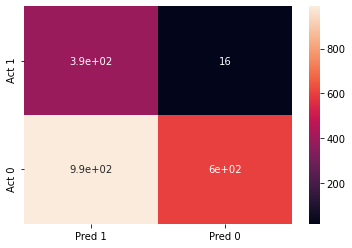

In [202]:
sns.heatmap(df_RF_CV,annot=True)

In [203]:
print(classification_report(y_test,y_pred_RF_CV))

              precision    recall  f1-score   support

           0       0.97      0.38      0.55      1593
           1       0.28      0.96      0.44       407

    accuracy                           0.50      2000
   macro avg       0.63      0.67      0.49      2000
weighted avg       0.83      0.50      0.52      2000



Setelah melakukan handling imbalance data dan hyper parameter tuning algoritma terbaik adalah dengan menggunakan Random Forest, karena False Negative nya lebih kecil dibandingkan dengan algoritma lain, dan score untuk recall class 1 dan precision class 0 lebih besar dibandingkan dengan algoritma lain dengan score 0.96 dan 0.97.

In [205]:
with open ('churnpredict', 'wb') as ML:
    pickle.dump(modelRF_CV, ML)

# Kesimpulan dan Saran

In [209]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [208]:
df.groupby('Exited')['Balance'].mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

Berdasarkan dari analisis di atas jumlah wanita yang keluar dari suatu bank ternyata lebih tinggi dibandingkan dengan pria. Jika dilihat berdasarkan negara Perancis dan Jerman paling banyak nasabah yang keluar baik itu wanitta maupun pria jika dibandingkan dengan negara Spanyol. Selain itu jumlah produk pun berpengaruh apakah seseorang keluar atau tidak, karena kebanyakan yang keluar nasabah yang hanya memiliki satu produk saja pada bank tersebut. Jika dilihar dari punya atau tidaknya kartu kredit kebanyakan nasabah yang keluar adalah nasabah yang tidak memiliki kartu kredit. Dan jika dilihat dari rata-rata balance atau sisa saldo dan salary cukup disangkan karena nasabah yang keluar memiliki rata-rata sisa tabungan dan salary yang lebih tinggi dibandingkan dengan yang bertahan, bisa jadi nasabah yang kaeluar merupakan nasabah yang potensial untuk bank tersebut, sehingga pihak bank harus bisa mempertahankan nasabah tersebut agar tidak keluar. Terutama wanita, karena jumlah wanita yang keluar lebih tinggi dibandingkan dengan pria. Dengan menggunakan model yang telah dibuat diharapkan dapat mendeteksi apakah nasabah tersebut akan keluar atau tidak agar dapat meminimalisir nasabah Bank yang akan keluar. Karena dengan model dengan score sebesar 96% setidaknya dapat menebak 1955 dari 2037 nasabah yang keluar dari kasus sebelumnya, dan jika anggapannya 1000 orang dapat dipertahankan dengan treatment yang dilakukan perusahaan maka setidaknya dapat menahan sekitar uang sebesar 91.000.000 euro agar tetap berada di perusahaan dan tidak jadi keluar. Karena rata-rata saldo nasabah yang keluar sebesar 91108 euro.

Saran :
- Pihak Bank dapat mempertahankan nasabah setelah nasabah tersebut diprediksi akan keluar dengan cara berbagai promo atau tawaran.
- Pihak Bank diharapkan dapat mempertahankan lebih banyak nasabah wanita yang diprediksi akan keluar karena banyak yang keluar merupakan nasabah wanita, bisa dengan tawaran-tawaran yang memang membuat wanita menarik.
- Pihak Bank harus mengadakan tawaran-tawaran atau promo kepada nasabah di bawah umur 60 yang memang diprediksi akan keluar, karena setelah umur 60 tahun nasabah lebih cenderung bertahan